In [1]:
import keras

C:\Users\VPL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import keras

In [3]:
print(keras.__version__)

2.2.2


In [4]:
from keras.datasets import mnist
from keras import models, layers

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)

(60000, 28, 28)


In [6]:
model = models.Sequential()
model.add(layers.Dense(
    512, 
    activation="relu",
    input_shape=(28 * 28,)
))
model.add(layers.Dense(
    10,
    activation="softmax"
))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#first number is the number of shamples
#followed by dimensionality
#print('Train', train_images.shape)
#print('Test:', test_images.shape)

#print one of my images
#matplot... apply a color map, to change it, we use cmap.
#plt.imshow(train_images[10], cmap='gray')
#plt.title(str(train_labels[10]))
#plt.show()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255.0

test_images = test_images.reshape((10000, 28 * 28 ))
test_images = test_images.astype('float32') / 255.0
from keras.utils import to_categorical
print('Before', train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('After', train_labels[1])

Before 5
After [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
#numbers weight and bias al principio are random
model.evaluate(train_images, train_labels)

60000/60000 [==============================] - 6s 96us/step


[2.3188423375447593, 0.13703333333333334]

In [9]:
#import numpy as np
#print(np.max(model.predict(train_images[0:1])))
#print(np.argmax(model.predict(train_images[0:1])))
#print(train_labels[0])

In [10]:
history = model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.2544 - acc: 0.9280
Epoch 2/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.1043 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.0693 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.0497 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.0369 - acc: 0.9889


{'loss': [0.25442776025533675, 0.10434238163630168, 0.06927329147060712, 0.04972639172375202, 0.03686219384856522], 'acc': [0.9279999999682108, 0.9691666666984559, 0.9793333333015442, 0.98495, 0.9888666666666667]}


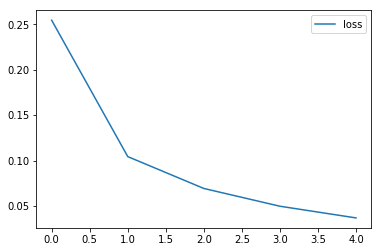

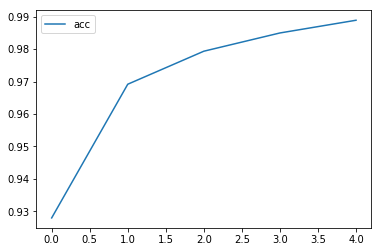

In [11]:
print(history.history)
plt.plot(history.history["loss"], label='loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label='acc')
plt.legend()
plt.show()
plt.close()

In [12]:
test_loss, test_acc = model.evaluate(train_images, train_labels)
print(test_loss, test_acc)

60000/60000 [==============================] - 5s 79us/step
0.024991730788202646 0.9929833333333333
